In [44]:
import os
import sys
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from utils import globo, mind
from utils import sparsity

In [70]:
DATASET, SUFFIX = 'Globo', 'medium'
# DATASET, SUFFIX = 'MIND', 'small'

PATH_BEHAVIOURS = {
    'Globo': f'examples/Globo/behaviors_{SUFFIX}.parquet',
    'MIND': f'examples/MIND/behaviors_{SUFFIX}.tsv'
}[DATASET]

PATH_ARTICLES = {
    'Globo': f'examples/Globo/articles_without_body_{SUFFIX}.parquet',
    'MIND': f'examples/MIND/articles_large_narrow.json'
}[DATASET]

if DATASET == 'Globo':
    articles_df = globo.read_articles(path=PATH_ARTICLES)
    behaviors_presel_df = globo.read_behavior(path=PATH_BEHAVIOURS)
elif DATASET == 'MIND':
    articles_df = mind.read_articles(path=PATH_ARTICLES)
    behaviors_presel_df = mind.read_behavior(path=PATH_BEHAVIOURS)


Nr of unique articles 23021


In [71]:
articles_df.tail()

,newsid,url,title,titleCharCount,textCharCount,cat_as_list,category,subcategory,cat_subcat
23016,c97e4649-0c78-48df-9e26-c0394dbabd22,http://g1.globo.com/pop-arte/tv-e-series/notic...,Equipe de Cara de Sapato pede desculpas após l...,124,3142,[cultura],news,cultura,[cultura]
23017,c6321943-6567-4660-a7bb-d57e0a38a9af,http://g1.globo.com/sp/sao-paulo/noticia/2022/...,Leilão dos Correios: uma única pessoa leva lot...,124,5419,"[cultura, economia, política]",news,cultura,"[cultura, economia, política]"
23018,234b79ab-8e8c-4841-89f7-8f9c0d5e59c6,http://g1.globo.com/ba/bahia/noticia/2023/03/2...,Travessia Salvador-Mar Grande é suspensa pelo ...,124,2301,[acidentes],news,acidentes,[acidentes]
23019,68ee36da-2763-435c-9b89-21672cc3754e,http://g1.globo.com/sp/piracicaba-regiao/notic...,Morador que auxiliou em resgate de recém-nasci...,124,2154,[violência],news,violência,[violência]
23020,feaaf7a5-adab-448d-ad01-8dd2d644b33f,http://g1.globo.com/ba/bahia/noticia/2022/10/0...,'Na sua estante' é a música mais tocada de Pit...,124,2171,[cultura],news,cultura,[cultura]


In [72]:
behaviors_presel_df.tail()

,index,user,impressionTimestamp,experiment,alternative,userType,positions,pool_array,historySize,behavior_array,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,datetime
76566,2c342b06-243d-4bd6-9c8f-ea2b1334e53a,e240ac14-93a9-4447-af54-760996024fc2,1679514081853,G1-FEED-BOX-user-sel-8,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[24b6206c-35b2-44f3-b103-ae97a202d229, be9b130...",50,"[df12d9ff-52a0-4cfa-a082-0f71109c1573, f9bffeb...","[1681427918524, 1681427709695, 1681427699592, ...","[56, 7, 0, 12, 32, 1, 6, 2, 3, 60, 0, 8, 0, 3,...","[308730, 194201, 28675, 38524, 67418, 9367, 10...","[56.76, 15.24, 16.49, 45.64, 40.67, 16.21, 13....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, ...",2023-03-22 16:41:21.853
76567,86ff8a05-ab92-43f1-9483-bb10e156ede7,e31c7b6d-4932-47dd-b7a3-422e4747094e,1678998887100,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[894d2ebe-d1b1-4a82-be57-823549627892, 7724a68...",50,"[a0f0aee4-dd93-4078-9ff7-ba4e4ae24aea, 06bd908...","[1681418260674, 1681418097359, 1681390018034, ...","[44, 18, 14, 31, 49, 3, 0, 15, 66, 13, 20, 17,...","[79924, 61027, 19982, 61722, 109476, 16223, 10...","[41.18, 45.89, 27.91, 25.43, 46.6, 14.97, 10.2...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...",2023-03-16 17:34:47.100
76568,f3140d1a-4e8e-479c-98af-dbac0ea2bca7,e3cd0188-d9f2-452b-a668-c9d40d91a58b,1679131114923,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[8b76f9b3-75c0-4dba-a55d-091d9cd8d51b, ab5be6b...",50,"[fd03ff84-c1fc-42a8-97f0-7043775144b7, 9607852...","[1681431773953, 1681431603139, 1681334721612, ...","[26, 22, 6, 38, 21, 2, 3, 14, 8, 6, 13, 0, 1, ...","[177878, 120610, 40000, 308575, 170057, 10011,...","[50.02, 43.65, 33.34, 92.68, 58.63, 19.5, 45.7...","[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-03-18 06:18:34.923
76569,16850458-bb7c-4592-98c8-a7f8fb7e92a5,f2afae59-000d-4ab5-9c5b-d68b2290d89d,1678886444771,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[f8043ff5-4129-411c-8ce6-3e320913a4d7, f8de1e2...",50,"[2e2fa484-3638-46c1-b9c4-a3b613868d91, 8770402...","[1681436576467, 1681397412781, 1681384585645, ...","[1, 1, 32, 42, 15, 14, 66, 30, 8, 34, 18, 27, ...","[10002, 10000, 53249, 242235, 60000, 90952, 31...","[9.79, 7.66, 14.34, 82.98, 34.12, 66.1, 69.73,...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-03-15 10:20:44.771
76570,6fc4aa5d-c344-4c2e-a1c2-e46625809f44,f65c8ffb-da4d-4525-9bdf-6e14c1964afa,1679115335690,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[22ed988c-eb1f-4bcf-95f5-50e6577d6c67, 2c1fe49...",50,"[ba7d6947-ca80-4385-bce2-cd31fee03d98, 412fe30...","[1681334673153, 1681334655211, 1681252321988, ...","[0, 0, 0, 0, 0, 3, 1, 2, 6, 0, 0, 0, 6, 0, 0, ...","[172503, 50000, 187674, 55543, 105073, 286741,...","[54.39, 27.24, 73.56, 52.39, 54.94, 72.44, 58....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-03-18 01:55:35.690


In [76]:
behaviors_presel_df

,index,user,impressionTimestamp,experiment,alternative,userType,positions,pool_array,historySize,behavior_array,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,datetime
0,aa3a1514-8da6-4a03-abc1-2257f72251a9,1071116436238923145,1680458176147,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Non-Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[bfd0a65d-7842-4fc0-ae4c-cdc3bc0ad5e8, 454c011...",48,"[86a78e7b-771c-4ea4-9206-1f15d4741f87, 7d9417b...","[1681371592199, 1681243359180, 1681243265635, ...","[45, 22, 26, 31, 3, 12, 67, 12, 18, 9, 17, 30,...","[137462, 70025, 73561, 85537, 30000, 44969, 20...","[27.41, 52.09, 30.34, 38.29, 16.89, 22.29, 45....","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-04-02 14:56:16.147
1,0b994c5a-bcc3-4cfe-a154-6539b2482cd6,1321456705957015912,1678970590634,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Non-Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[c2f27f6a-369e-41a2-93d4-aca0e5f21996, eed399d...",47,"[1ac1a2d2-5df6-47de-bb35-e89c26f88d95, 24a3e92...","[1681399749271, 1681385034555, 1681384940416, ...","[9, 10, 7, 20, 8, 17, 3, 3, 50, 13, 24, 14, 46...","[22947, 30000, 31190, 66016, 10005, 80000, 104...","[29.01, 28.66, 32.3, 31.43, 29.04, 26.36, 33.7...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-03-16 09:43:10.634
2,f3e4b7df-12f4-4a19-875c-bd16a132124d,14216867203183201221101,1679410873479,G1-FEED-BOX-user-sel-8,als-top-engaj,Non-Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[7e36e8bd-b4b7-4930-9ecf-7455e562a159, 6b40f9d...",48,"[6b40f9d1-6ba8-4a77-871d-03d5bbd93519, 66c8d22...","[1681418242030, 1681414956401, 1681401086588, ...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[20000, 370000, 170000, 40000, 185152, 99358, ...","[10.27, 42.41, 35.74, 34.33, 27.55, 44.6, 38.4...","[1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-03-21 12:01:13.479
3,7fd6dd67-8c9e-43e7-a778-5175a157ad5b,14546984257975961831,1679154720889,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Non-Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[e31aef8f-8088-4505-8e12-af7d52a0107c, 3f32929...",47,"[24f18170-4391-42fb-839a-9b2011306a40, f12abfa...","[1681235088283, 1681234338264, 1681234224871, ...","[12, 137, 21, 4, 40, 2, 76, 113, 13, 32, 17, 2...","[26765, 745688, 109733, 17159, 150300, 10000, ...","[52.8, 94.35, 63.72, 26.59, 71.85, 44.42, 99.7...","[1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, ...",2023-03-18 12:52:00.889
4,de24388c-2e22-4cf5-8818-e46feebbdf47,16495613543727945718,1680219439364,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Non-Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[87e85fda-437e-4f8f-b3d2-c303c0de9621, 2a81eca...",46,"[2a81eca3-a057-4390-ae0c-79bc24850c03, e446d0a...","[1681411806293, 1681411651351, 1681381707836, ...","[19, 16, 9, 16, 5, 10, 25, 27, 18, 12, 14, 37,...","[99308, 95523, 39849, 91456, 20000, 30000, 136...","[48.88, 39.99, 32.19, 31.8, 30.66, 32.25, 45.7...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2023-03-30 20:37:19.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76566,2c342b06-243d-4bd6-9c8f-ea2b1334e53a,e240ac14-93a9-4447-af54-760996024fc2,1679514081853,G1-FEED-BOX-user-sel-8,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[24b6206c-35b2-44f3-b103-ae97a202d229, be9b130...",50,"[df12d9ff-52a0-4cfa-a082-0f71109c1573, f9bffeb...","[1681427918524, 1681427709695, 1681427699592, ...","[56, 7, 0, 12, 32, 1, 6, 2, 3, 60, 0, 8, 0, 3,...","[308730, 194201, 28675, 38524, 67418, 9367, 10...","[56.76, 15.24, 16.49, 45.64, 40.67, 16.21, 13....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, ...",2023-03-22 16:41:21.853
76567,86ff8a05-ab92-43f1-9483-bb10e156ede7,e31c7b6d-4932-47dd-b7a3-422e4747094e,1678998887100,G1-FEED-BOX-SMART-user-sel-12,als-top-engaj,Logged,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[894d2ebe-d1b1-4a82-be57-823549627892, 7724a68...",50,"[a0f0aee4-dd93-4078-9ff7-ba4e4ae24aea, 06bd908...","[1681418260674, 1681418097359, 1681390018034, ...","[44, 18, 14, 31, 49, 3, 0, 15, 66, 13, 20

In [21]:
users_interactions_count_df = (
    behaviors_presel_df[['user', 'behavior_array']]
    .explode('behavior_array')
    .rename({'behavior_array': 'newsid'}, axis=1)
    .groupby('user')
    .count()
)

users_interactions_count_df.tail()

,newsid
user,
U9990,1
U9994,1
U9996,20
U9998,28
U9999,42


In [22]:
items_interactions_count_df = (
    behaviors_presel_df[['user', 'behavior_array']]
    .explode('behavior_array')
    .rename({'behavior_array': 'newsid'}, axis=1)
    .groupby('newsid')
    .count()
)

items_interactions_count_df = pd.merge(
    articles_df[['newsid']],
    items_interactions_count_df,
    on='newsid',
    how='left'
).fillna(0)

items_interactions_count_df.tail()

,newsid,user
68387,N15890,0.0
68388,N34020,0.0
68389,N119744,0.0
68390,N119588,0.0
68391,N33587,0.0


In [23]:
n_users = behaviors_presel_df['user'].nunique()
n_items = articles_df['newsid'].nunique()
n_interactions = behaviors_presel_df['behavior_array'].explode().nunique()
user_gini = sparsity.gini_coefficient(users_interactions_count_df['newsid'].values)
item_gini = sparsity.gini_coefficient(items_interactions_count_df['user'].values)

100%|██████████| 68391/68391 [00:04<00:00, 16801.12it/s]


In [24]:
print ('Number of users:', n_users)
print ('Number of items:', n_items)
print ('Number of interactions:', n_interactions)
print ('Space Log:', sparsity.space_log(n_users, n_items))
print ('Shape Log:', sparsity.shape_log(n_users, n_items))
print ('Density Log:', sparsity.density_log(n_users, n_items, n_interactions))
print ('Overall Sparsity:', 1-10**(sparsity.density_log(n_users, n_items, n_interactions)))
print ('User Gini:', user_gini)
print ('Item Gini:', item_gini)

Number of users: 50000
Number of items: 68392
Number of interactions: 37682
Space Log: 6.533975308409208
Shape Log: -0.1360352997371709
Density Log: -4.957841363176031
Overall Sparsity: 0.9999889805825243
User Gini: 0.6765973475342618
Item Gini: 0.9596907126510239


# Category Distribution

In [45]:
df_plot = (
    articles_df[['newsid', 'cat_as_list']]
    .explode('cat_as_list')
    .rename({'cat_as_list': 'cat'}, axis=1)
    .groupby('cat')
    .count()
    .sort_values(by='newsid', ascending=False)
    .reset_index()
)
df_plot.head()

,cat,newsid
0,news,21036
1,sports,19972
2,finance,4247
3,foodanddrink,3386
4,lifestyle,3249


100%|██████████| 16/16 [00:00<00:00, 23117.07it/s]


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Number of categories: 17 (Gini Index: 0.63)'}, xlabel='newsid', ylabel='cat'>)

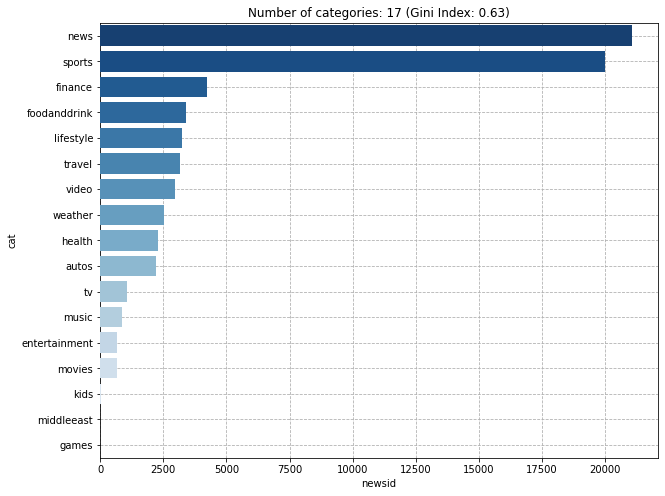

In [67]:
def plot_cat_distribution(df:pd.DataFrame, figsize=(10,8)):
    n_categories = df["cat"].nunique()
    gini_index = '{:.02f}'.format(sparsity.gini_coefficient(df_plot['newsid'].values))

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    sns.barplot(
        data=df,
        x='newsid',
        y='cat',
        ax=ax,
        palette='Blues_r',
        zorder=3
    )
    ax.grid(True, linestyle='--', zorder=1)

    ax.set_title(f'Number of categories: {n_categories} (Gini Index: {gini_index})')
    return fig, ax

plot_cat_distribution(df_plot)

In [221]:
algos = ['als', 'recents', 'top24h']
top_ats = [3, 4, 5]
results_path = 'examples/results/Globo'
metric_names = ["calibration", "representation", "fragmentation"]
figsize=(10,8)

df_metrics = pd.DataFrame()

for algo in algos:
    for top_at in top_ats:
        for metric_name in metric_names:
            df_temp = pd.read_parquet(f'{results_path}/{algo}_at_{top_at}_{metric_name}.parquet')
            df_temp['algo'] = algo
            df_temp['top_at'] = top_at
            df_temp['metric_name'] = metric_name
            df_temp.rename({metric_name: "metric_value"}, axis=1, inplace=True)
            df_temp.rename({metric_name+"_bin": "metric_value_bin"}, axis=1, inplace=True)
            df_metrics = pd.concat([df_metrics, df_temp])

df_metrics["provider"] = df_metrics["user"].apply(lambda x: "cadun" if '-' in x else "anonymous")

df_metrics.tail()

,index,user,metric_value,algo,metric_value_bin,top_at,metric_name,provider
1649,feb259de-f64e-44c1-b3e1-e7ab5d25fc0c,9756103b-ab28-4533-b240-61a671624e6d,0.601117,top24h,0.600,5,fragmentation,cadun
1650,feb4988b-7b6f-4d36-beed-586df5b19b5e,f9df7469-f2ca-49e7-b794-2de538fee5b7,0.781117,top24h,0.780,5,fragmentation,cadun
1651,fed80559-9d79-4689-b4df-dd6c83842046,12374968894806540356,0.637374,top24h,0.635,5,fragmentation,anonymous
1652,ffd5b2e7-ebe6-447f-8502-e39c8a794ad7,17903464343051858353,0.604037,top24h,0.605,5,fragmentation,anonymous
1653,ffdbdffa-b3e2-48f5-860c-11f4a66363ef,3553417659088873286,0.696365,top24h,0.695,5,fragmentation,anonymous


## Violin Plot

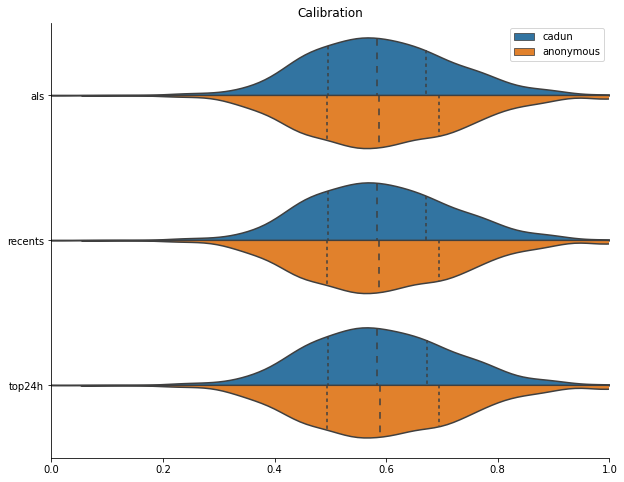

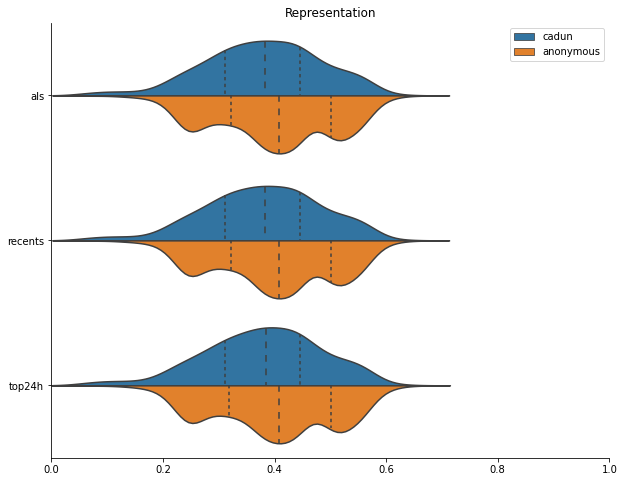

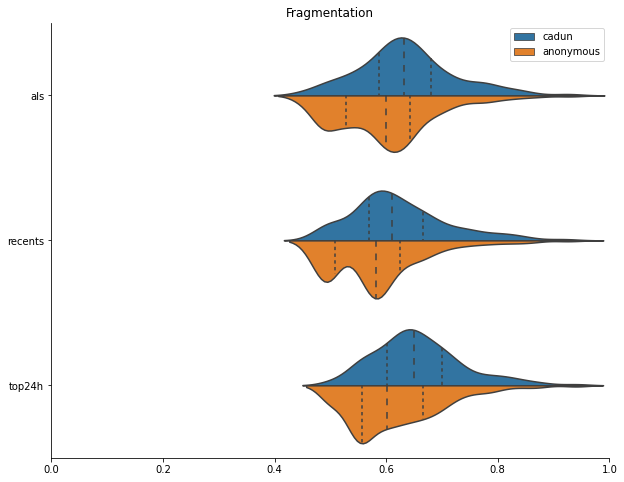

In [224]:
def plot_violin_metric(df:pd.DataFrame, title:str, figsize=(16,10)):

    fig, ax = plt.subplots(nrows=1, figsize=figsize, sharex=True)
    sns.violinplot(
        ax=ax,
        data=df_plot,
        y="algo",
        x="metric_value",
        stat="probability",
        bins=200,
        inner="quartile",
        split=True,
        hue="provider",
        zorder=1
    )
    ax.legend()
    # ax.grid(True, linestyle='--', zorder=5)
    ax.set_xlim([0,1])
    [ax.spines[spine].set_visible(False) for spine in ["top", "right"]]
    ax.set_xlabel(''), ax.set_ylabel('')
    ax.set_title(title)

    return fig, ax

top_at = 5
for metric_name in metric_names:
    df_plot = df_metrics.query("top_at == @top_at and metric_name == @metric_name")
    fig, ax = plot_violin_metric(df_plot, metric_name.title(), figsize=figsize)
    fig.savefig(os.path.join(results_path, 'plots', f'{metric_name}_at_{top_at}.png'), bbox_inches='tight')


## Rank Cutoff

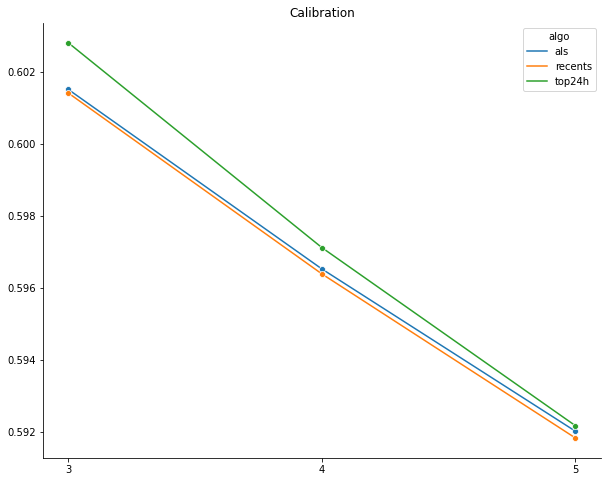

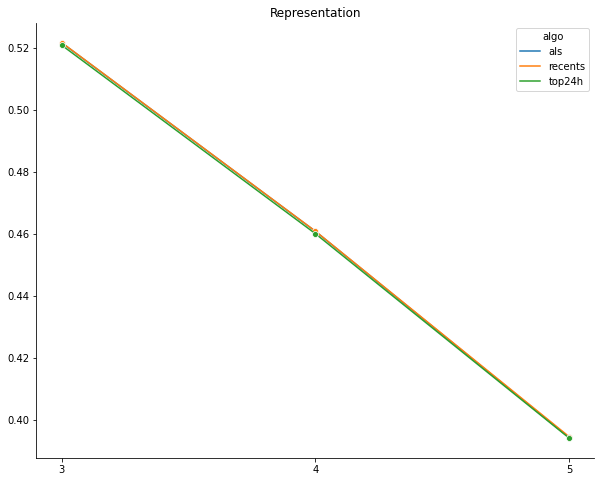

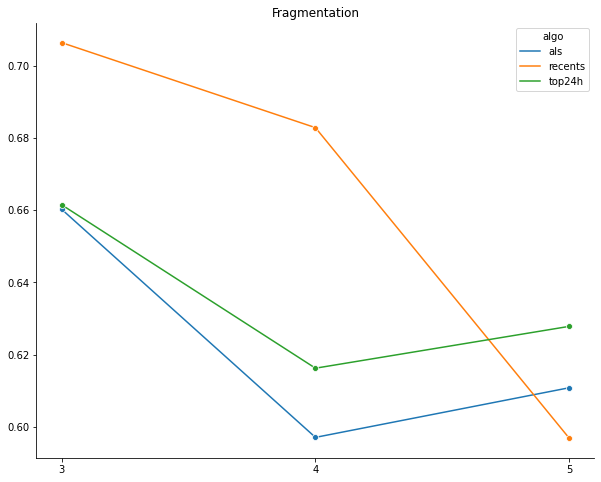

In [226]:
def plot_rank_cuoff(df:pd.DataFrame, title:str, figsize=(16,10)):


    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(
        ax=ax,
        data=df_plot,
        x='top_at',
        y='metric_value',
        hue='algo',
        markers=True,
        marker='o'
    )
    [ax.spines[spine].set_visible(False) for spine in ["top", "right"]]
    ax.set_xlabel(''), ax.set_ylabel('')
    ax.set_title(metric_name)
    ax.set_xticks(df_plot['top_at'].unique())
    ax.set_title(title)

    return fig, ax


for metric_name in metric_names:
    df_plot = df_metrics.query("metric_name == @metric_name")[['metric_value', 'top_at', 'algo']]
    df_plot = df_plot.groupby(['algo', 'top_at'])['metric_value'].mean().reset_index()
    fig, ax = plot_rank_cuoff(df_plot, title=metric_name.title(), figsize=figsize)
    fig.savefig(os.path.join(results_path, 'plots', f'{metric_name}_rank_cutoff.png'), bbox_inches='tight')
